
The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). with focus on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
indices = [26,176,392]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9898,961,2861,3151,242,833
1,45640,6958,6536,7368,1532,230
2,518,4180,3600,659,122,654


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [5]:
new_data = data.drop('Fresh',axis=1)
label=data['Fresh']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(new_data,label,test_size=0.25,random_state=42)


regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)


score = r2_score(y_test,y_pred)
print('Regressor has an prediction score of {}'.format(score))

Regressor has an prediction score of -0.33307053360466754


I attempted to predict 'Fresh' feature. 

The prediction score of the regressor is -0.33, 

Based on the R2 score we can say that the model has failed to fit the data. Which means that rest of the features doesnt help in predicting the feature. Since this feature cannot be predicted, we can say that this feature is necessary to identify customer spend habits. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data.

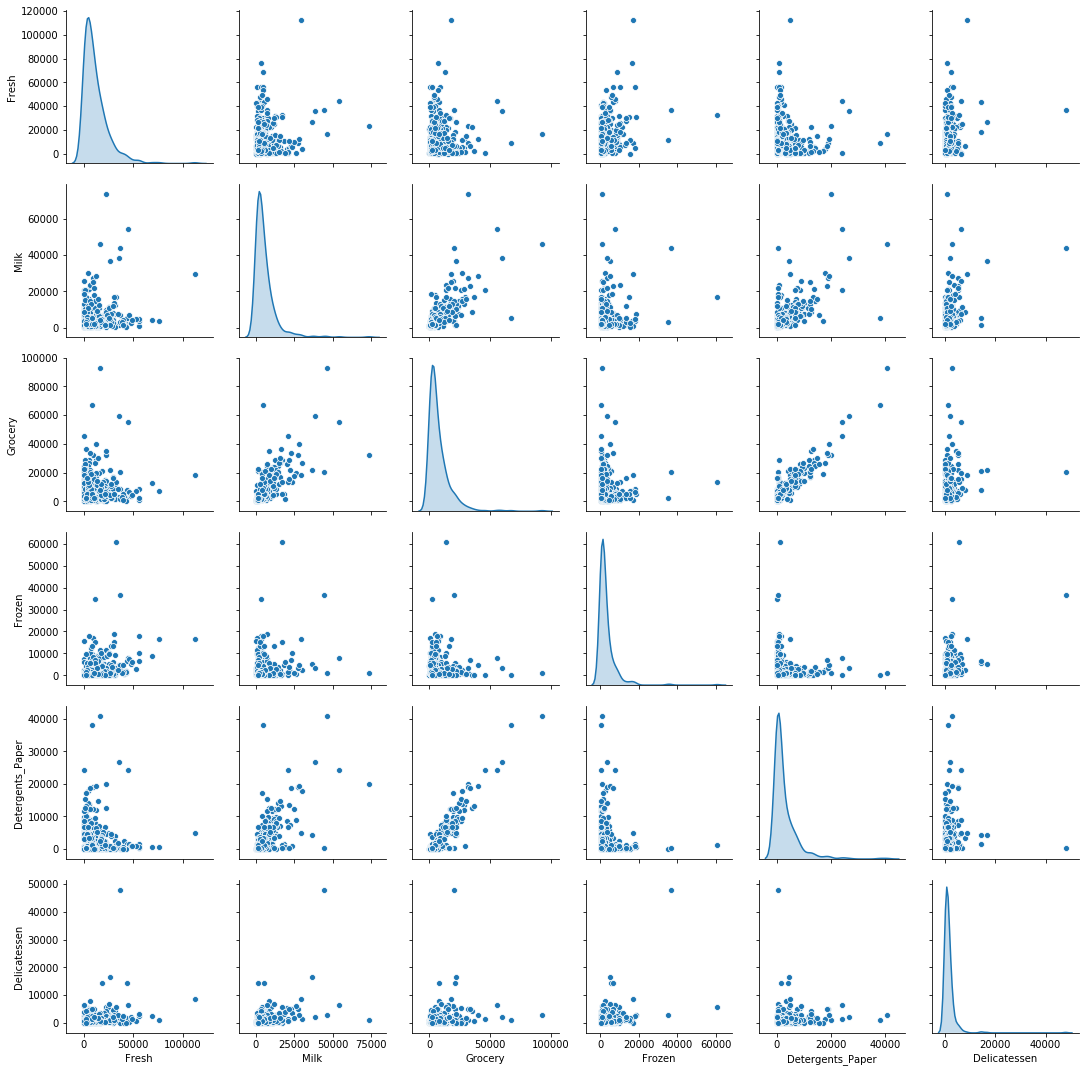

In [6]:
import seaborn as sns
sns.pairplot(data,diag_kind = 'kde')

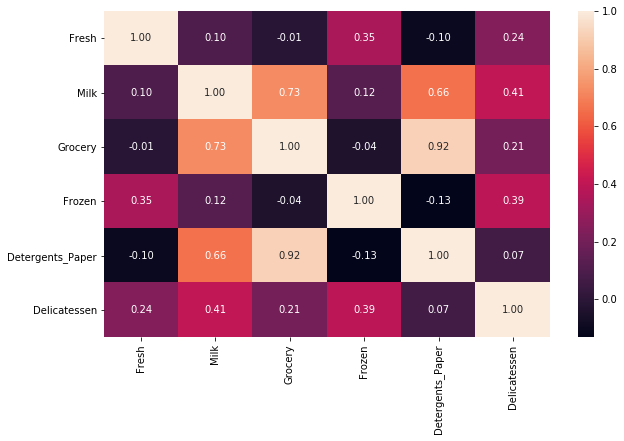

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True,fmt='.2f')
plt.show()

From the scatter matrix and the heatmap it is evident that majority of the data doesnt follow a bivariate normal distrbution. 
Few features seem to show a skewed normal distrbution along its own marginal axes which means that a particular feature isnt effected by the other. Take detergent_paper and delicatessen for example. Data seems to be spread only along detergent_paper indicating that spend on delicatessen doesnt relate to spend on detergent_paper
on the other hand, few features show a distribution along both marginal axes which means that those features are contrast to each other. Take detergent_paper and Fresh for instance, from the plot we can infer that people who spend more on Fresh might not spend much on detergent_paper and vice versa. 
Hence we can say that the features doesnt follow a Normal distribution. we can also see that the data is more skewed towards the center. This can be due to the dataset not being scaled and these outliers can impact any model. 

The pair of features that seem to exhibit some correlation are below - 

Grocery and deteregents_paper - compared to all others this pair to seem to show high degree of correlation. It is normally distributed but the data is skewed at the origin

Milk - Grocery and Milk - detergent_paper exhibit mild correlation as we can see. It shows variance on both features but still follows a normal distribution. 

This confirms my statement about the relevance of the feature I attempted to predict. we can see that the feature i attempted to predict i.e. Fresh doesnt show any kind of relevance to other features. So it is hard to predict feature 'Fresh' given other features. 

## Data Preprocessing

### Implementation: Feature Scaling

In [8]:

log_data = np.log(data)


log_samples = np.log(samples)


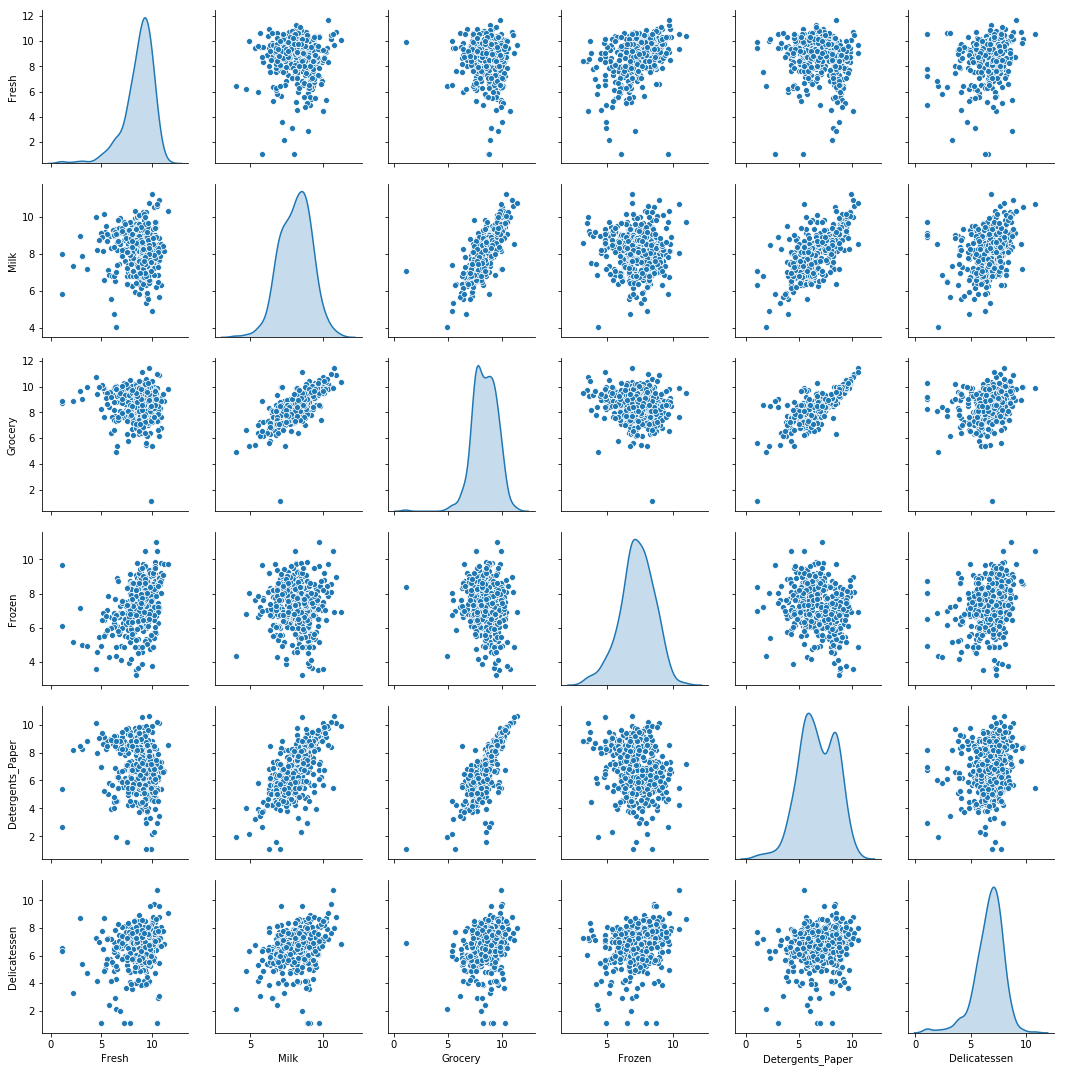

In [9]:
sns.pairplot(log_data,diag_kind = 'kde')

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.200088,6.867974,7.958926,8.055475,5.488938,6.725034
1,10.728540,8.847647,8.785081,8.904902,7.334329,5.438079
2,6.249975,8.338067,8.188689,6.490724,4.804021,6.483107


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

In [11]:

for feature in log_data.keys():
    
    
    Q1 = np.percentile(log_data[feature],25)
    print(Q1)
    
    
    Q3 = np.percentile(log_data[feature],75)
    print(Q3)
    
    
    step = 1.5 * (Q3-Q1)
    print(step)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [66, 75, 338, 142, 154, 289]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

8.048058702214819
9.73706394795268
2.533507868606793
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


7.334981240042021
8.880480088587671
2.318248272818475
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


7.67461620137308
9.27385367723784
2.3988562137971394
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


6.609677749172153
8.175896083178294
2.3493275010092116
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


5.548101424791306
8.274340598750195
4.0893587609383335
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


6.011874656932535
7.506728426547161
2.2422806544219394
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


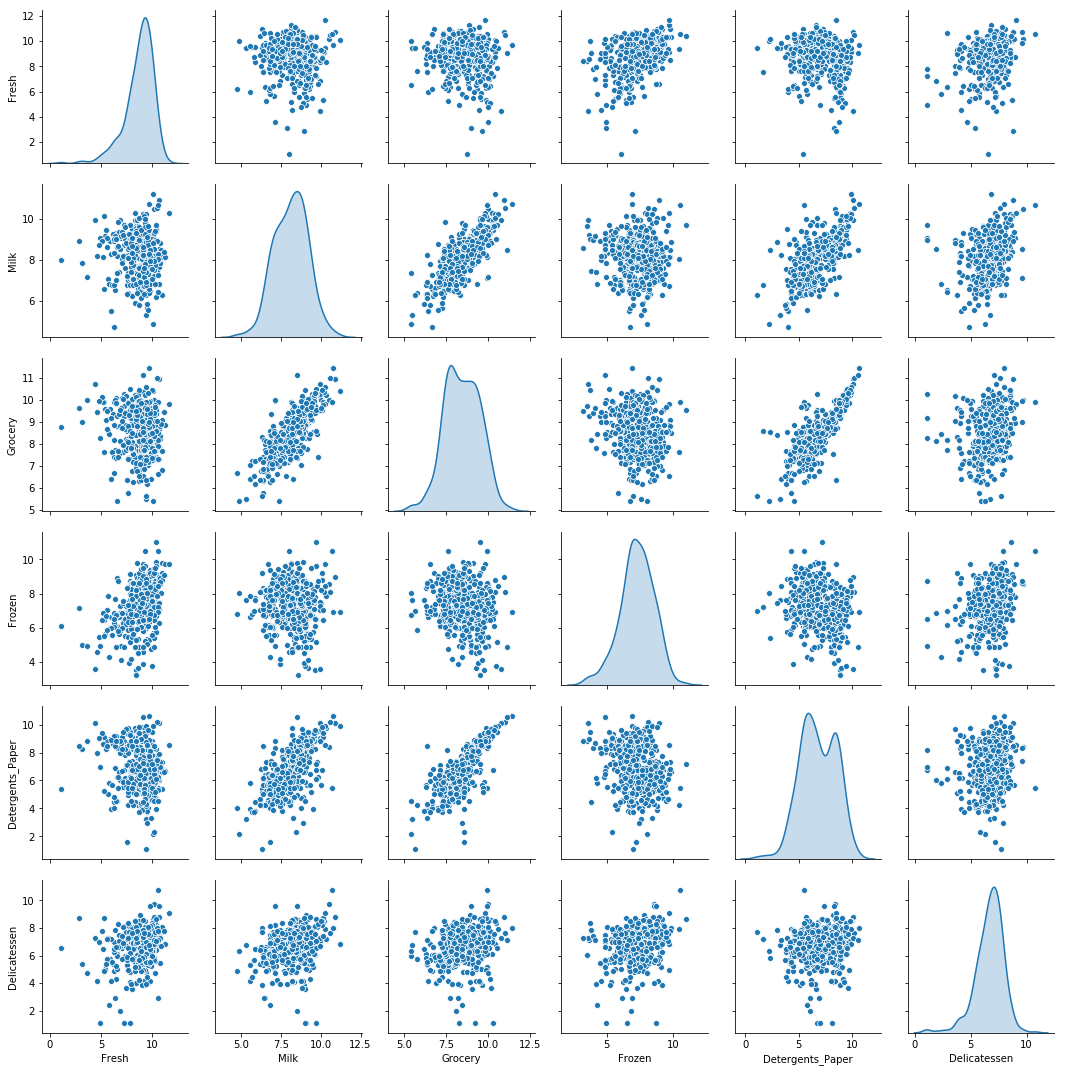

In [12]:
sns.pairplot(good_data,diag_kind = 'kde')

## Feature Transformation


### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved.

In [13]:

from sklearn.decomposition import PCA
pca = PCA()

pca.fit(good_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.n_components_

6

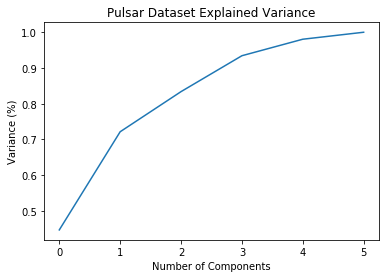

In [15]:
#Plotting the Cumulative Summation of the Explained Variance
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

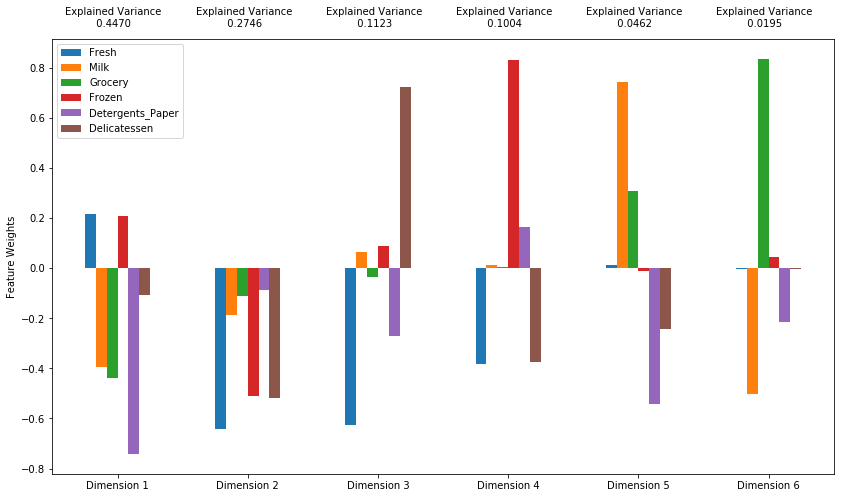

In [16]:
pca_samples = pca.transform(log_samples)

pca_results = vs.pca_results(good_data, pca)

In [17]:
print(pca.explained_variance_ratio_)

[0.44696778 0.27462924 0.11227818 0.10043625 0.04615921 0.01952934]


In [18]:
print(pca.components_)

[[ 0.21392264 -0.39475187 -0.44010253  0.20691301 -0.74192568 -0.10700991]
 [-0.64381547 -0.18576705 -0.11241997 -0.50991866 -0.08727179 -0.52030817]
 [-0.62720898  0.06414633 -0.03758881  0.08806961 -0.2720558   0.72063209]
 [-0.38236666  0.01374015  0.00569147  0.82912144  0.16410724 -0.37309651]
 [ 0.01137444  0.74284767  0.30735768 -0.01142146 -0.54234253 -0.24354333]
 [-0.00374186 -0.50352295  0.83531878  0.04290564 -0.2164462  -0.00182239]]


Variance of 1st PC - 0.44302505  
Variance of 2nd PC - 0.26379218
Total Variance of 1st two PCs = 0.44302505 + 0.26379218 = ~70.6%

Variance of 3rd PC - 0.1230638 
Variance of 4th PC - 0.10120908
Total Variance of 1st four PCs = 0.44302505 + 0.26379218 + 0.1230638 + 0.10120908 = 93.1%

I'd guess the negative weights indicate the direction of variance of that feature in that dimension. That being said, 

The first PC has shown and variance of 0.44. so, looking at the values of the vectors, this dimension has captured good variance of Milk, grocery and detergent_paper. This behavior is same as one of the samples I picked in question #1. This dimension could represent a supplier, retailer etc. It also shows that the other two features(Fresh and frozen) are in perfect contrast with the other features, the means customer may not spend on those as per first dimension

The second PC has captured good variation of Fresh, Frozen and delicatessen. It also captured decent variation in Milk feature along the direction as other features which means all these features are relevant to each other. This dimension could represent a restaurant because it needs all features except detergent_paper to prepare food and restaurant also uses detergent_paper for cleaning etc which also is shown as relevant to other features. 

The Third PC captured variance on delicatessen, Fresh and frozen with fresh being completely contrast to other two features. This could represent a take away shop like in the aiports which has delicacies, fresh salads and frozen foods ready to eat.

Fourth PC captures variance of frozen foods and delicatessen with both showing complete contrast in relevance. so customer might be spending on frozen foods or delicatessen. so it can represnt a small store. 


In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.9731,-0.2674,0.1058,0.2054,-0.3841,0.5387
1,0.0993,-1.6366,-2.1115,1.1401,0.6607,-0.1344
2,0.8708,2.3166,1.9160,0.0354,1.1933,0.0830


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem.

In [20]:
pca = PCA(n_components=2)
pca.fit(good_data)

reduced_data = pca.transform(good_data)

pca_samples = pca.transform(log_samples)


reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.9731,-0.2674
1,0.0993,-1.6366
2,0.8708,2.3166


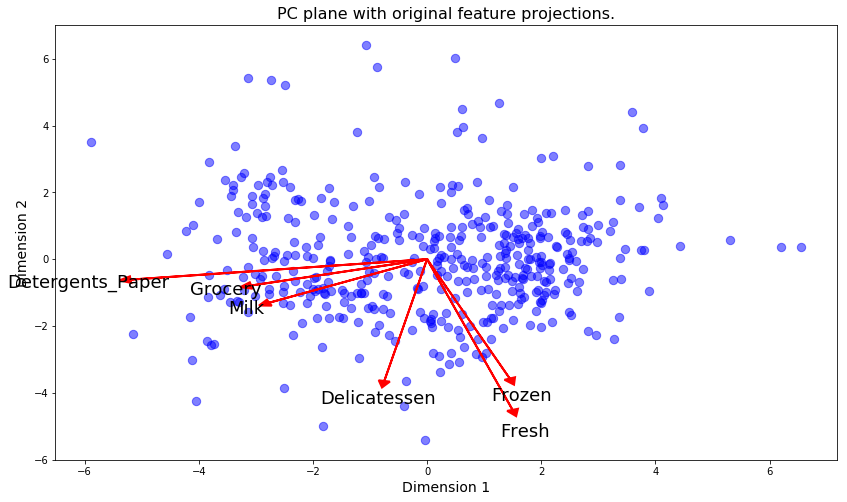

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)